# Togo Solar Dataset — Exploratory Data Analysis (EDA)
This notebook performs profiling, cleaning, and exploratory analysis on the Togo solar dataset.  
The goal is to prepare a cleaned dataset for further regional comparison.


# Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
file_path = r"..\data\togo-dapaong_qc.csv"


df = pd.read_csv(file_path)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


### Summary Stats & Checking for Missing Values

In [ ]:
print('The description of the columns is as follows')
df.describe().T

The description of the columns is as follows


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7


In [ ]:
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100
missing = pd.concat([missing_counts.rename('missing_count'), missing_pct.rename('missing_pct')], axis=1)
missing = missing.sort_values('missing_pct', ascending=False)

print(missing)

cols_over5 = missing[missing['missing_pct'] > 5].index.tolist()
if cols_over5:
    print("Columns with >5% missing:", cols_over5)
else:
    print("No columns with >5% missing.")

               missing_count  missing_pct
Comments              525600        100.0
GHI                        0          0.0
Timestamp                  0          0.0
DNI                        0          0.0
DHI                        0          0.0
ModB                       0          0.0
ModA                       0          0.0
RH                         0          0.0
WS                         0          0.0
WSgust                     0          0.0
Tamb                       0          0.0
WSstdev                    0          0.0
WD                         0          0.0
BP                         0          0.0
WDstdev                    0          0.0
Cleaning                   0          0.0
Precipitation              0          0.0
TModA                      0          0.0
TModB                      0          0.0
Columns with >5% missing: ['Comments']


Now that we've identified the columns with > 5% missing values, let's also check the data types and other information to see which ones need cleaning.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### Initial Cleaning
- Convert `Timestamp` to datetime for proper time series analysis.
- Drop `Comments` column since it contains no data.
- Confirm remaining columns and data types are suitable for numerical analysis.


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

df = df.drop(columns=['Comments'])

# Preview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


### Handling Missing Values (if any)
Although no missing data was found in the other columns, for reproducibility we demonstrate how median imputation would be applied to key numerical columns.


In [ ]:
cols_to_impute = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
for col in cols_to_impute:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


### Outlier Detection

Using Z-scores allows identification of extreme sensor readings that might indicate faulty measurements or rare atmospheric events. Values with |Z| > 3 will be considered outliers and filtered out. This ensures the dataset reflects realistic environmental conditions.

In [ ]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols_to_check], nan_policy='omit'))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)
outlier_counts


array([ 305, 1062, 3415,  137,  206, 3510, 3915])

This printed array gives us the outlier count based on Z score for each column in same order as cols_to_check:
GHI: 305,
DNI: 1062,
DHI: 3415,
ModA: 137,
ModB: 206,
WS: 3510,
WSgust: 3915,

In [ ]:
# Keep only rows where all |Z| <= 3 (no outliers)
df_clean = df[(z_scores < 3).all(axis=1)]

print("Cleaned dataset shape:", df_clean.shape)

df_clean.to_csv("../data/togo_clean.csv", index=False)

print("Cleaned dataset saved to: data/Togo_clean.csv")

Cleaned dataset shape: (516349, 18)
Cleaned dataset saved to: data/Togo_clean.csv


### Cleaning Impact Analysis
To evaluate whether cleaning events improve module readings, we compare average ModA and ModB values when Cleaning == 1 versus when Cleaning == 0.

                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


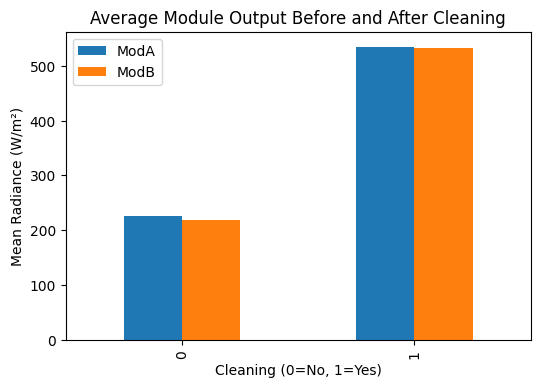

In [ ]:
if 'Cleaning' in df.columns:
    cleaning_effect = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    print(cleaning_effect)
    cleaning_effect.plot(kind='bar', figsize=(6,4))
    plt.title("Average Module Output Before and After Cleaning")
    plt.xlabel("Cleaning (0=No, 1=Yes)")
    plt.ylabel("Mean Radiance (W/m²)")
    plt.show()
else:
    print("No 'Cleaning' column found in dataset.")


### Time Series Analysis

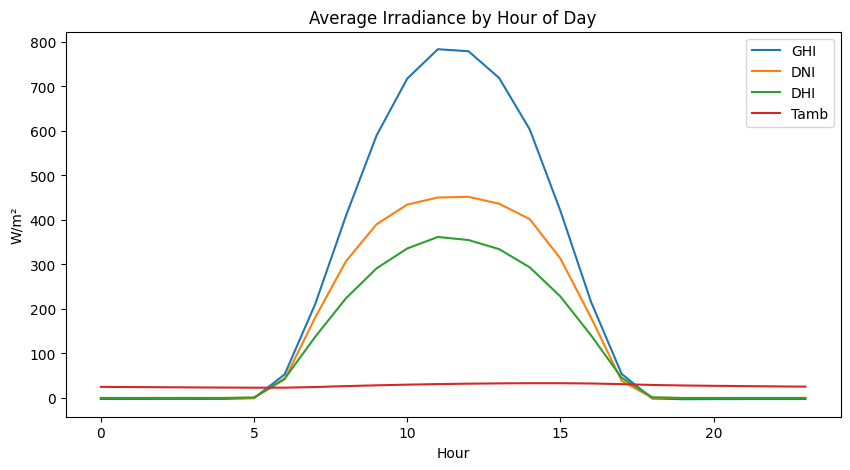

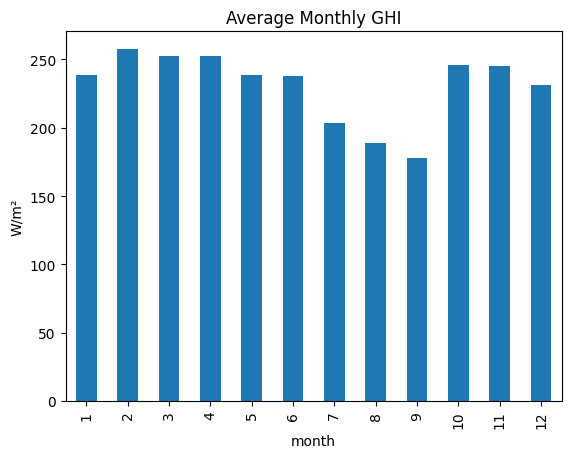

In [ ]:
df = df.set_index('Timestamp')
df['hour'] = df.index.hour
hourly_means = df.groupby('hour')[['GHI', 'DNI', 'DHI','Tamb']].mean()
hourly_means.plot(figsize=(10,5))
plt.title("Average Irradiance by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("W/m²")
plt.show()

df['month'] = df.index.month
monthly = df.groupby('month')[['GHI']].mean()
monthly.plot(kind='bar', legend=False)
plt.title("Average Monthly GHI")
plt.ylabel("W/m²")
plt.show()


The first plot shows how solar irradiance (GHI, DNI, DHI) and ambient temperature (Tamb) vary over the course of a day. We can see clear daily patterns—irradiance peaks around midday, while temperature follows slightly later, consistent with expected solar behavior.

The second bar chart shows the average monthly GHI, revealing seasonal variation. Higher GHI values during certain months indicate stronger solar potential, helping identify optimal installation periods or expected seasonal performance.

### Correlation Analysis

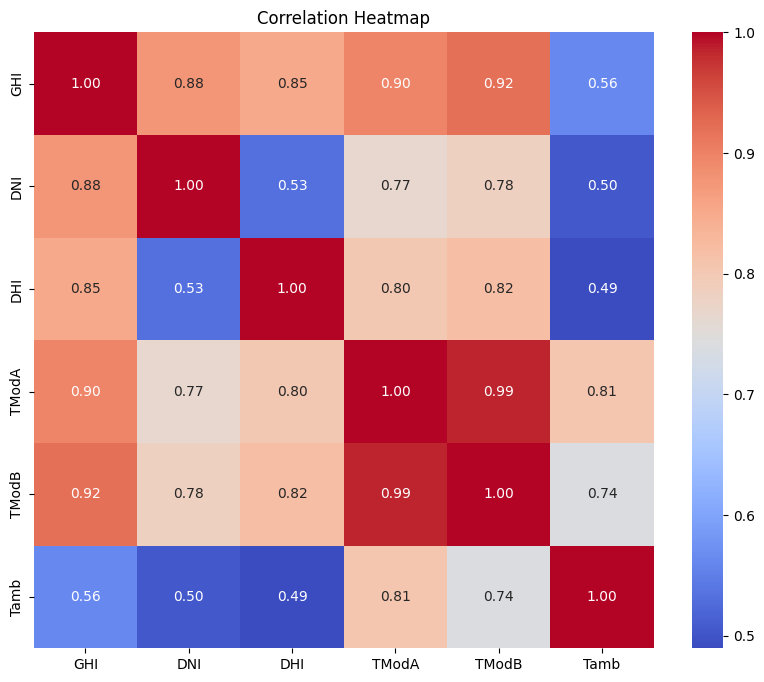

In [ ]:
corr = df[['GHI','DNI','DHI','TModA','TModB','Tamb']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




- Strong positive correlations among **GHI**, **DNI**, and **DHI** confirm consistent sensor measurements of solar radiation components.  
- **TModA** and **TModB** show near-perfect correlation (≈ 0.98–0.99), verifying the sensors record almost identical temperature responses.  
- The moderate correlation between irradiance and module temperatures highlights that higher sunlight increases panel heat.  
- The relatively lower correlation between **Tamb** and irradiance suggests ambient temperature is influenced by other weather conditions too.  

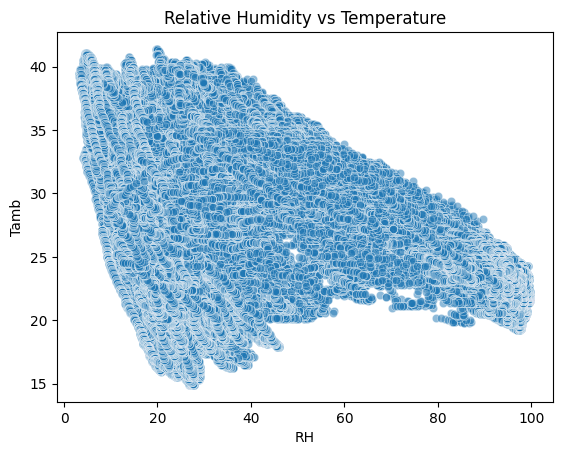

In [ ]:
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title("Relative Humidity vs Temperature")
plt.show()


- The scatter plot illustrates the relationship between **Relative Humidity (RH)** and **Ambient Temperature (Tamb)** across the observation period.  
- There is a clear **negative correlation**: as temperature increases, humidity decreases.  
- This inverse pattern is physically consistent: higher temperatures often occur during sunny, dry conditions, while cooler periods tend to coincide with increased atmospheric moisture.  
- The dense cluster of points shows that most measurements fall within moderate temperature (20–35 °C) and humidity (20–60 %) ranges, typical of warm, semi-humid environments.  
- Lower humidity and higher temperature periods are generally favorable for stronger solar irradiance, which may enhance the performance of photovoltaic systems in Togo.


### Wind & Distribution Analysis

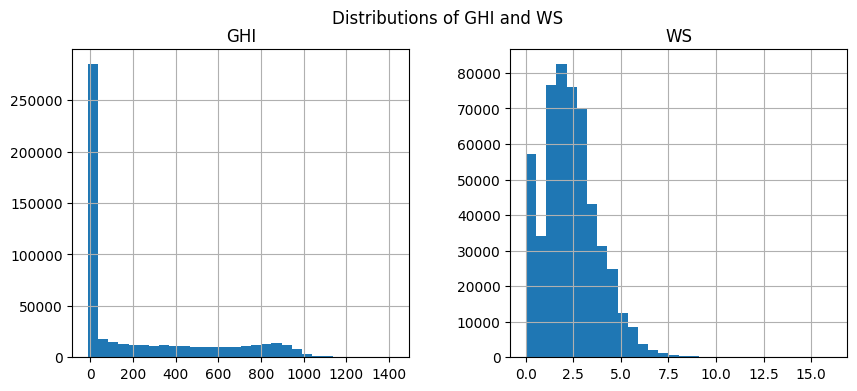

C:\Users\HP\AppData\Local\Temp\ipykernel_6416\3651131903.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_dir_summary = df.groupby(wind_bins)['WS'].mean()


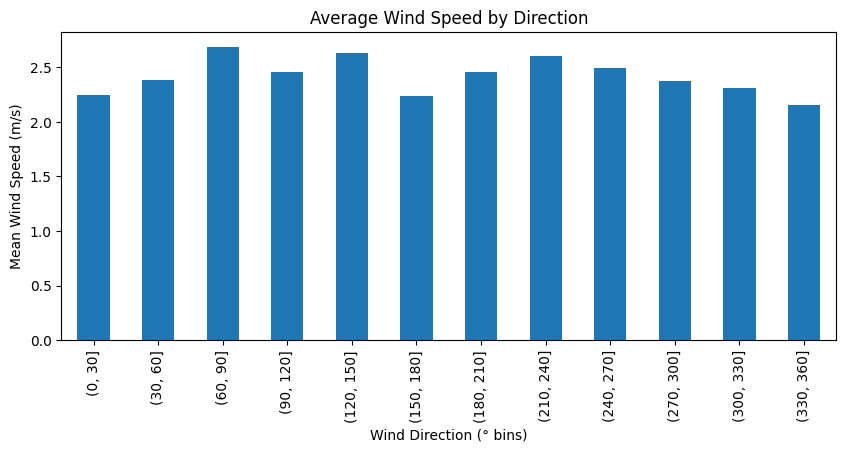

In [ ]:
df[['GHI','WS']].hist(bins=30, figsize=(10,4))
plt.suptitle("Distributions of GHI and WS")
plt.show()

wind_bins = pd.cut(df['WD'], bins=np.arange(0, 361, 30))
wind_dir_summary = df.groupby(wind_bins)['WS'].mean()
wind_dir_summary.plot(kind='bar', figsize=(10,4))
plt.title("Average Wind Speed by Direction")
plt.xlabel("Wind Direction (° bins)")
plt.ylabel("Mean Wind Speed (m/s)")
plt.show()


### Temperature vs Humidity (Bubble Chart)

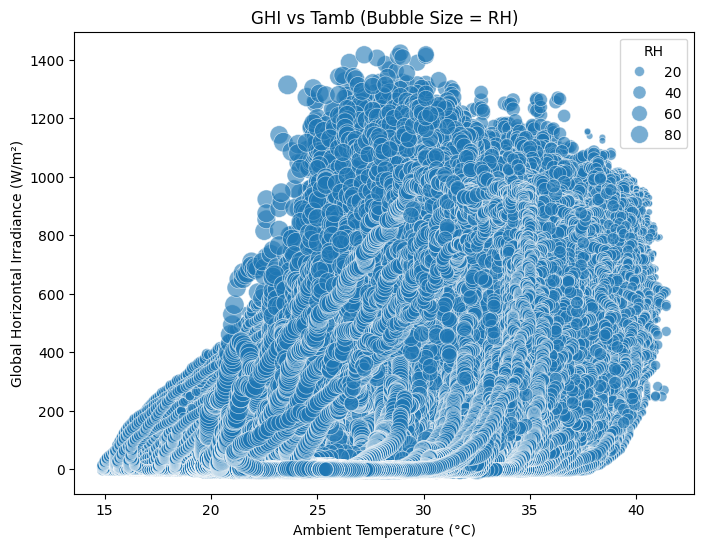

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Tamb', y='GHI', size='RH', data=df, alpha=0.6, sizes=(20,200))
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.show()


## Summary
- Dataset cleaned and validated.  
- Outliers handled via Z-score.  
- Missing values imputed with median.  
- Clear diurnal and seasonal trends observed.  
- Cleaning events correlate with higher module output.  
- Strong positive correlations between GHI, DNI, DHI.
